In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 96FF-6D42

 Directory of C:\Users\radhi\Desktop\Assignments of Radhika\Assignment no7 (Clustering)

30-12-2022  18:14    <DIR>          .
30-12-2022  10:51    <DIR>          ..
30-12-2022  17:37    <DIR>          .ipynb_checkpoints
30-12-2022  18:14           162,708 Airlines.ipynb
03-12-2022  15:40             1,328 crime_data.csv
30-12-2022  17:24           266,576 CrimeData.ipynb
15-12-2022  15:54           157,167 EastWestAirlines.csv
03-12-2022  15:40             1,560 Problem_Statement(Airlines).txt
03-12-2022  15:46               399 ProblemSatement(crime_data).txt
               6 File(s)        589,738 bytes
               3 Dir(s)  77,080,625,152 bytes free


In [3]:
crime=pd.read_csv("crime_data.csv")

# Data Understanding

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [7]:
crime.head(2)

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


# Scaling of the data

In [8]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [9]:
#Normalization dataframe
df_norm = norm_func(crime.iloc[:,1:])

In [10]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Create Dendogram

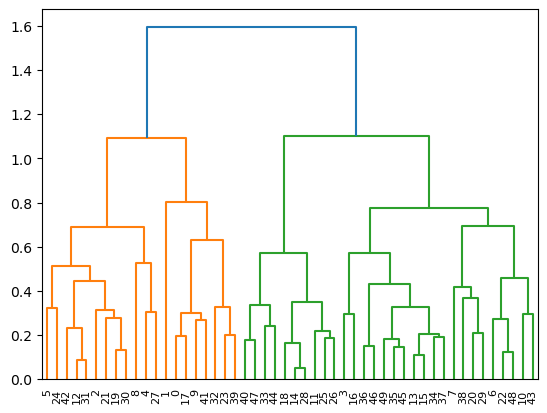

In [11]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

# Create Clusters

In [12]:
hc = AgglomerativeClustering(n_clusters=5, affinity ='euclidean',linkage='single')

In [13]:
hc.fit_predict(df_norm)

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
#save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

crime['h_clusterid']=y_hc

In [15]:
crime

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [16]:
crime.groupby(["h_clusterid"])["city"].apply(lambda x:tuple(x))

h_clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: city, dtype: object

In [17]:
crime[crime["city"].isin(["Alabama", "Arizona", "Arkansas", "California"])]

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [19]:
data1=crime[crime.h_clusterid==0]
data1[["city","h_clusterid"]]
data1["city"].count()

46

# K Means

In [20]:
crime=pd.read_csv("crime_data.csv")

In [33]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [38]:
crime.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [43]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0


In [45]:
df_norm=norm_func(crime.iloc[:,1:])

In [46]:
from sklearn.cluster import KMeans

In [47]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [48]:
model_kmeans.labels_

array([4, 1, 1, 0, 1, 1, 3, 3, 1, 4, 3, 2, 1, 0, 2, 0, 0, 4, 2, 1, 3, 1,
       2, 4, 1, 0, 0, 1, 2, 3, 1, 1, 4, 2, 3, 0, 3, 3, 3, 4, 2, 4, 1, 3,
       2, 0, 3, 2, 2, 0])

In [49]:
md=pd.Series(model_kmeans.labels_)

In [50]:
#Complete-linkage clutering -wikipedic
crime["labels"]=pd.Series(model_kmeans.labels_)

In [51]:
crime.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [52]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [53]:
crime.groupby(["labels"])["city"].apply(lambda x:tuple(x))

labels
0    (Arkansas, Indiana, Kansas, Kentucky, Montana,...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
3    (Connecticut, Delaware, Hawaii, Massachusetts,...
4    (Alabama, Georgia, Louisiana, Mississippi, Nor...
Name: city, dtype: object

In [54]:
crime[crime["city"].isin(["Alaska", "Arizona", "California", "Colorado"])]

,city,Murder,Assault,UrbanPop,Rape,labels
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1


In [55]:
crime.columns

Index(['city', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'labels'], dtype='object')

In [56]:
data1=crime[crime.labels==0]
data1[["city","labels"]]
data1["city"].count()

9

# DB SCAN

In [57]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

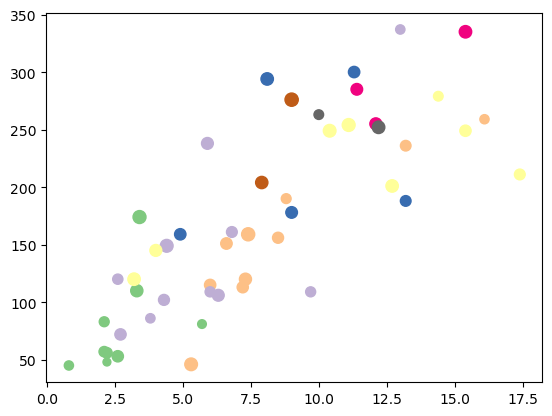

In [58]:
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],crime["Rape"],cmap=plt.cm.Accent)

# Using Kmeans


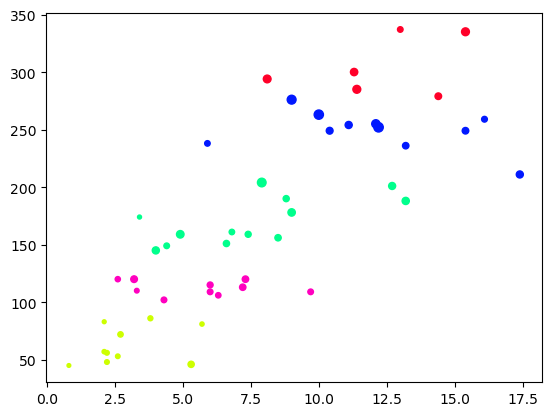

In [59]:
model = KMeans(n_clusters=5,max_iter=600,algorithm='auto')
model.fit(crime.iloc[:,1:-1])
plt.scatter(crime["Murder"],crime["Assault"],crime["Rape"],c=model.labels_,cmap=plt.cm.gist_rainbow)

In [60]:
model.labels_

array([3, 3, 0, 2, 3, 2, 4, 3, 0, 3, 1, 4, 3, 4, 1, 4, 4, 3, 1, 0, 2, 3,
       1, 3, 2, 4, 4, 3, 1, 2, 0, 3, 0, 1, 4, 2, 2, 4, 2, 0, 1, 2, 2, 4,
       1, 2, 2, 1, 1, 2])

# Using Hierarchical

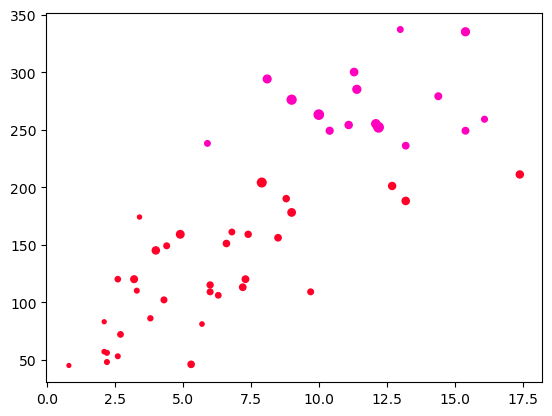

In [61]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.scatter(crime["Murder"],crime["Assault"],crime["Rape"],c=cluster.fit_predict(crime.iloc[:,[1,2,4]]),cmap=plt.cm.gist_rainbow)


# Using DBSCAN

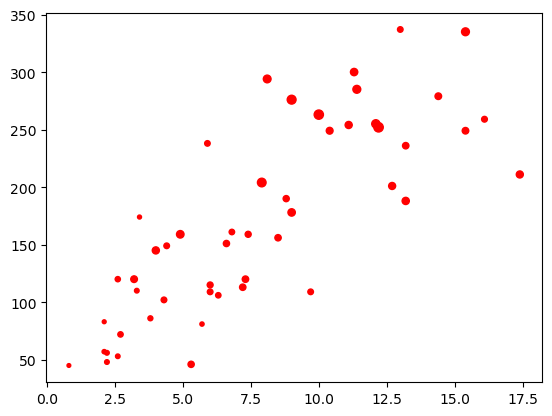

In [62]:
dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(crime.iloc[:,1:-1])
plt.scatter(crime["Murder"],crime["Assault"],crime["Rape"],c=class_pr,cmap=plt.cm.rainbow_r)

# Finding The Optimal Number Of Clusters

In [63]:
import seaborn as sns
crime.sample(7)

,city,Murder,Assault,UrbanPop,Rape,labels
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
9,Georgia,17.4,211,60,25.8,4
49,Wyoming,6.8,161,60,15.6,0
46,Washington,4.0,145,73,26.2,3
44,Vermont,2.2,48,32,11.2,2
4,California,9.0,276,91,40.6,1


# Elbow Method

In [64]:
nc=[1,2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(crime.iloc[:,1:-1])
    iner.append(km.inertia_)

In [65]:
iner

[355807.82159999997,
 96399.02814449917,
 47964.26535714285,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15734.052499999998,
 13436.825531746032,
 11640.71583333333]

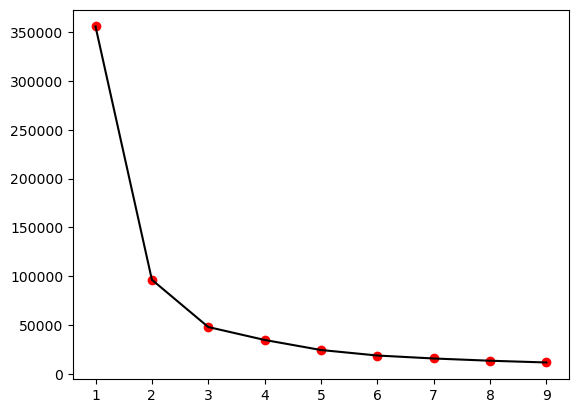

In [66]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# Silhouette_Score

In [71]:
from sklearn.metrics import silhouette_score as sil

In [72]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(crime.iloc[:,1:-1])
    sc_score.append(sil(crime.iloc[:,1:-1],y))

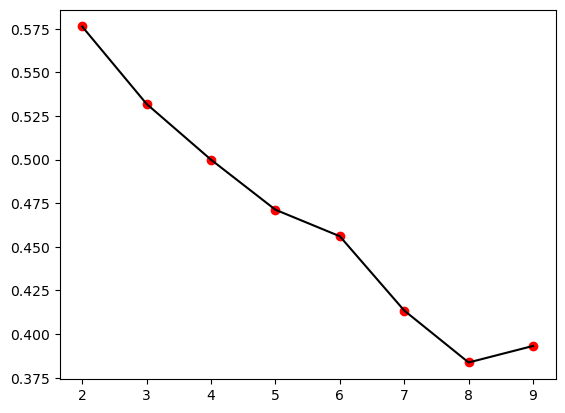

In [73]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [70]:
sc_score

[0.576270501827592,
 0.5319024108339816,
 0.49995555523087537,
 0.4712663068668769,
 0.4560609984337978,
 0.41350970386620134,
 0.3837294897408242,
 0.3932080131345171]